In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
customer = np.zeros(100)
for i in range(100):
    customer[i] = i+1
print(customer)

[  1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.  14.
  15.  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.  28.
  29.  30.  31.  32.  33.  34.  35.  36.  37.  38.  39.  40.  41.  42.
  43.  44.  45.  46.  47.  48.  49.  50.  51.  52.  53.  54.  55.  56.
  57.  58.  59.  60.  61.  62.  63.  64.  65.  66.  67.  68.  69.  70.
  71.  72.  73.  74.  75.  76.  77.  78.  79.  80.  81.  82.  83.  84.
  85.  86.  87.  88.  89.  90.  91.  92.  93.  94.  95.  96.  97.  98.
  99. 100.]


In [3]:
interarrival_time = np.random.randint(1, high=9, size=(100))
interarrival_time[0] = 0
print(interarrival_time)

[0 6 1 3 7 5 3 2 3 1 3 1 3 4 3 2 3 1 8 5 7 3 4 4 5 7 1 3 1 6 8 3 5 2 8 4 4
 8 2 3 1 5 2 8 5 1 1 1 7 8 5 1 5 5 3 2 2 3 8 2 7 7 8 5 2 4 1 2 2 8 8 8 2 3
 7 6 8 3 3 7 1 6 5 7 3 1 2 4 3 4 7 5 2 2 2 6 3 4 6 7]


In [4]:
service_time = np.zeros(100)
for i in range(100):
    a = np.random.rand()
    if a < 0.1:
        service_time[i] = 1
    elif a < 0.3:
        service_time[i] = 2
    elif a < 0.6:
        service_time[i] = 3
    elif a < 0.85:
        service_time[i] = 4
    elif a < 0.95:
        service_time[i] = 5
    else:
        service_time[i] = 6
print(service_time)

[3. 3. 2. 2. 4. 4. 3. 4. 4. 4. 2. 2. 3. 4. 5. 3. 3. 4. 3. 3. 4. 4. 5. 4.
 3. 1. 5. 1. 3. 5. 2. 5. 5. 4. 1. 3. 6. 5. 3. 3. 5. 4. 3. 4. 4. 2. 4. 4.
 5. 3. 2. 3. 2. 2. 3. 5. 3. 4. 2. 4. 4. 4. 6. 4. 5. 3. 2. 4. 4. 2. 1. 2.
 1. 5. 4. 4. 2. 1. 2. 4. 1. 1. 5. 3. 5. 3. 3. 3. 2. 1. 2. 4. 3. 2. 5. 6.
 6. 3. 3. 6.]


In [6]:
arrival_time = np.zeros(100)
for i in range(1,100):
    arrival_time[i] = arrival_time[i-1] + interarrival_time[i]
print(arrival_time)

[  0.   6.   7.  10.  17.  22.  25.  27.  30.  31.  34.  35.  38.  42.
  45.  47.  50.  51.  59.  64.  71.  74.  78.  82.  87.  94.  95.  98.
  99. 105. 113. 116. 121. 123. 131. 135. 139. 147. 149. 152. 153. 158.
 160. 168. 173. 174. 175. 176. 183. 191. 196. 197. 202. 207. 210. 212.
 214. 217. 225. 227. 234. 241. 249. 254. 256. 260. 261. 263. 265. 273.
 281. 289. 291. 294. 301. 307. 315. 318. 321. 328. 329. 335. 340. 347.
 350. 351. 353. 357. 360. 364. 371. 376. 378. 380. 382. 388. 391. 395.
 401. 408.]


In [7]:
time_service_begins = np.zeros(100)
time_service_ends = np.zeros(100)
time_service_ends[0] = time_service_begins[0] + service_time[0]
for i in range(1,100):
    time_service_begins[i] = max(arrival_time[i], time_service_ends[i-1])
    time_service_ends[i] = time_service_begins[i] + service_time[i]

In [8]:
waiting_time = np.zeros(100)
time_in_system = np.zeros(100)
idle_time_server = np.zeros(100)
for i in range(1,100):
    waiting_time[i] = time_service_begins[i] - arrival_time[i]
    time_in_system[i] = time_service_ends[i] - arrival_time[i]
    idle_time_server[i] = time_service_begins[i] - time_service_ends[i-1]

In [9]:
data = {
    'customer': customer.astype(int),
    'interarrival_time': interarrival_time.astype(int),
    'arrival_time': arrival_time.astype(int),
    'service_time': service_time.astype(int),
    'time_service_begins': time_service_begins.astype(int),
    'waiting_time': waiting_time.astype(int),
    'time_service_ends': time_service_ends.astype(int),
    'time_in_system': time_in_system.astype(int),
    'idle_time_server': idle_time_server.astype(int)
}

output = pd.DataFrame(data)

output

,customer,interarrival_time,arrival_time,service_time,time_service_begins,waiting_time,time_service_ends,time_in_system,idle_time_server
0,1,0,0,3,0,0,3,0,0
1,2,6,6,3,6,0,9,3,3
2,3,1,7,2,9,2,11,4,0
3,4,3,10,2,11,1,13,3,0
4,5,7,17,4,17,0,21,4,4
...,...,...,...,...,...,...,...,...,...
95,96,6,388,6,390,2,396,8,0
96,97,3,391,6,396,5,402,11,0
97,98,4,395,3,402,7,405,10,0
98,99,6,401,3,405,4,408,7,0


In [10]:
customer = np.zeros(100)
for i in range(100):
    customer[i] = i+1

interarrival_time = np.random.randint(1, high=9, size=(100))
interarrival_time[0] = 0

service_time = np.zeros(100)
for i in range(100):
    a = np.random.rand()
    if a < 0.1:
        service_time[i] = 1
    elif a < 0.3:
        service_time[i] = 2
    elif a < 0.6:
        service_time[i] = 3
    elif a < 0.85:
        service_time[i] = 4
    elif a < 0.95:
        service_time[i] = 5
    else:
        service_time[i] = 6

arrival_time = np.zeros(100)
for i in range(1,100):
    arrival_time[i] = arrival_time[i-1] + interarrival_time[i]

time_service_begins = np.zeros(100)
time_service_ends = np.zeros(100)
time_service_ends[0] = time_service_begins[0] + service_time[0]
for i in range(1,100):
    time_service_begins[i] = max(arrival_time[i], time_service_ends[i-1])
    time_service_ends[i] = time_service_begins[i] + service_time[i]

waiting_time = np.zeros(100)
time_in_system = np.zeros(100)
idle_time_server = np.zeros(100)
for i in range(1,100):
    waiting_time[i] = time_service_begins[i] - arrival_time[i]
    time_in_system[i] = time_service_ends[i] - arrival_time[i]
    idle_time_server[i] = time_service_begins[i] - time_service_ends[i-1]

data = {
    'customer': customer.astype(int),
    'interarrival_time': interarrival_time.astype(int),
    'arrival_time': arrival_time.astype(int),
    'service_time': service_time.astype(int),
    'time_service_begins': time_service_begins.astype(int),
    'waiting_time': waiting_time.astype(int),
    'time_service_ends': time_service_ends.astype(int),
    'time_in_system': time_in_system.astype(int),
    'idle_time_server': idle_time_server.astype(int)
}

# output = pd.DataFrame(data)

# output

# output.describe()

probability_of_idle_server = np.sum(idle_time_server)/time_service_ends[99]
print(probability_of_idle_server)

0.2909930715935335


In [11]:
# 50 trials

average_waiting_time = np.zeros(50)
for trial in range(50):
    customer = np.zeros(100)
    for i in range(100):
        customer[i] = i+1

    interarrival_time = np.random.randint(1, high=9, size=(100))
    interarrival_time[0] = 0

    service_time = np.zeros(100)
    for i in range(100):
        a = np.random.rand()
        if a < 0.1:
            service_time[i] = 1
        elif a < 0.3:
            service_time[i] = 2
        elif a < 0.6:
            service_time[i] = 3
        elif a < 0.85:
            service_time[i] = 4
        elif a < 0.95:
            service_time[i] = 5
        else:
            service_time[i] = 6

    arrival_time = np.zeros(100)
    for i in range(1,100):
        arrival_time[i] = arrival_time[i-1] + interarrival_time[i]

    time_service_begins = np.zeros(100)
    time_service_ends = np.zeros(100)
    time_service_ends[0] = time_service_begins[0] + service_time[0]
    for i in range(1,100):
        time_service_begins[i] = max(arrival_time[i], time_service_ends[i-1])
        time_service_ends[i] = time_service_begins[i] + service_time[i]

    waiting_time = np.zeros(100)
    time_in_system = np.zeros(100)
    idle_time_server = np.zeros(100)
    for i in range(1,100):
        waiting_time[i] = time_service_begins[i] - arrival_time[i]
        time_in_system[i] = time_service_ends[i] - arrival_time[i]
        idle_time_server[i] = time_service_begins[i] - time_service_ends[i-1]

    data = {
        'customer': customer.astype(int),
        'interarrival_time': interarrival_time.astype(int),
        'arrival_time': arrival_time.astype(int),
        'service_time': service_time.astype(int),
        'time_service_begins': time_service_begins.astype(int),
        'waiting_time': waiting_time.astype(int),
        'time_service_ends': time_service_ends.astype(int),
        'time_in_system': time_in_system.astype(int),
        'idle_time_server': idle_time_server.astype(int)
    }

    average_waiting_time[trial] = np.sum(waiting_time)/100

In [12]:
print(average_waiting_time)

[1.55 1.24 2.54 1.68 1.26 3.91 1.16 1.54 1.54 5.64 1.15 0.95 0.7  1.67
 0.79 0.73 1.38 1.17 1.61 0.46 0.83 0.84 2.22 1.   1.39 0.87 1.69 0.98
 0.72 2.1  1.69 2.23 0.87 0.91 1.52 0.74 1.03 1.8  1.26 1.7  1.43 1.84
 1.05 1.15 4.06 2.03 1.7  0.87 1.27 0.61]


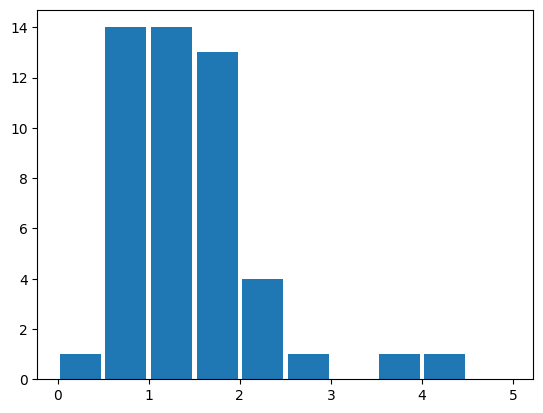

In [13]:
plt.hist(average_waiting_time, range=(0,5), rwidth = 0.9)
plt.show()